In [1]:
import os
!python --version
print('conda environment: {}'.format(os.environ['CONDA_DEFAULT_ENV']))

Python 3.6.1 :: Continuum Analytics, Inc.
conda environment: astroconda35


In [2]:
from datetime import datetime as dt
print('Last edit on: {}'.format(dt.now()))

Last edit on: 2017-11-23 12:23:47.395048


In [3]:
# Python 2 and 3 compatible
try:
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
except ImportError:
    from urllib2 import urlopen, Request, HTTPError
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
pl_params = "pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_radj,pl_radjerr1,pl_radjerr2,pl_dens,pl_trandep,pl_instrument,pl_insol,pl_eqt,"
pl_err = 'pl_bmassjerr1,pl_bmassjerr2,pl_bmassjerr1,pl_bmassjerr2,pl_orbpererr1,pl_orbpererr2,'
st_params = "st_optmag,ra,dec,st_dist,st_teff,st_mass,st_rad,st_plx,gaia_plx,gaia_dist,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_acts,st_bmvj,st_jmh2,"
others = 'pl_instrument,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,st_j,st_h,st_k,pl_ttvflag,'
full_url= url+'&select='+ pl_params + pl_err + st_params+others

outpath_extended = 'confirmed_planets_extended_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download
fname='data/'+outpath_extended

if os.path.isfile(fname):
    df = pd.read_csv(fname)
else:
    print("Downloading data from URL:\n{}".format(url))
    response = urlopen(full_url)
    html = response.read()
    
    with open(fname,'wb') as f:
         f.write(html)
    print("Saved file as {}".format(outpath_extended))

df = pd.read_csv(fname)
df.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,st_j,st_h,st_k
0,HD 142,b,Radial Velocity,2001,2,349.7,1.02,0.170,NaN,1.25,...,UCLES Spectrograph,3.9 m Anglo-Australian Telescope,2014-08-21,0,Wittenmyer et al. 2012,Tinney et al. 2002,http://exoplanet.eu/catalog/hd_142_b/,4.690,4.646,4.474
1,HD 142,c,Radial Velocity,2012,2,6005.0,6.80,0.210,NaN,5.30,...,UCLES Spectrograph,3.9 m Anglo-Australian Telescope,2014-08-21,0,Wittenmyer et al. 2012,Wittenmyer et al. 2012,http://exoplanet.eu/catalog/hd_142_c/,4.690,4.646,4.474
2,HD 1502,b,Radial Velocity,2011,1,431.8,1.31,0.101,NaN,3.10,...,HIRES Spectrometer,10 m Keck I Telescope,2014-05-14,0,Johnson et al. 2011,Johnson et al. 2011,http://exoplanet.eu/catalog/hd_1502_b/,6.681,6.234,6.120


In [4]:
print('Number of Detected Planets per Technique:\n')
df['pl_discmethod'].value_counts()

Number of Detected Planets per Technique:



Transit                          2771
Radial Velocity                   654
Microlensing                       51
Imaging                            44
Transit Timing Variations          15
Eclipse Timing Variations           9
Orbital Brightness Modulation       6
Pulsar Timing                       5
Pulsation Timing Variations         2
Astrometry                          1
Name: pl_discmethod, dtype: int64

## Questions
### How many have stars have multiple planets detected?

In [5]:
df['pl_hostname'].value_counts().head()

TRAPPIST-1    7
KOI-351       7
Kepler-11     6
HD 219134     6
HD 34445      6
Name: pl_hostname, dtype: int64

## Multiplanet systems with TTV flag

In [28]:
cols = 'pl_hostname,pl_letter,pl_pnum,pl_orbsmax,pl_radj,st_optmag'.split(',')
df.query('pl_radj > 0.4 and pl_orbsmax < 0.5 and pl_pnum>2')[cols].query('pl_hostname=="K2-19" or pl_hostname=="KOI-94"')

,pl_hostname,pl_letter,pl_pnum,pl_orbsmax,pl_radj,st_optmag
449,KOI-94,e,4,0.3046,0.585,12.205
1532,K2-19,b,3,0.0740,0.691,13.000
1533,K2-19,c,3,0.0971,0.434,13.000
1663,KOI-94,d,4,0.1684,1.005,12.205


In [62]:
ttv = df.query('pl_pnum > 1 and pl_discmethod=="Transit" and pl_ttvflag==1') #.to_csv('multiplanetary_systems.csv')

### Planet in mean motion resonance

Few multiplanetary systems are known to be in mean motion resonance. The longest system in near-resonance is TRAPPIST-1 (Gillon et al. 2017). Another is Kepler 223 which Mills et al. (2016) propsed to be a by-product of inward migration. How many system have mean motion resonances and are these systems' architectures similar or different? Does these systems have inner planet (or outer planet) that might indicate migration?    

In [20]:
#non-unique names of multiplanet systems; e.g. HR8799 has 4 entries for b,c,d,e
df['pl_pnum'].value_counts()

1    2052
2     768
3     378
4     196
5     100
6      24
7      14
Name: pl_pnum, dtype: int64

In [21]:
#unique names of multiplanet systems
multiple_system = df['pl_hostname'].value_counts()#.index

multiple_system[:5]

KOI-351       7
TRAPPIST-1    7
Kepler-20     6
HD 219134     6
Kepler-11     6
Name: pl_hostname, dtype: int64

## Filter using the ff criteria

* distance
* optical magnitude
* TTV presence
* etc...

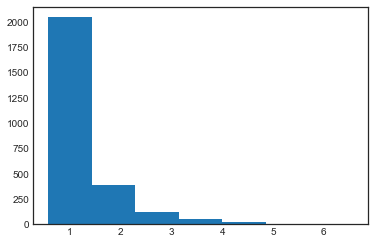

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
#multiple_system.plot(bins=6,kind='hist', normed=True)
plt.hist(multiple_system, bins=7, align='left');

### Sample

see also KOI-351

In [23]:
from fractions import Fraction as F

#must be sorted accdg to planet letter
var=df.query('pl_hostname == "TRAPPIST-1"').sort_values('pl_letter')
a=var.pl_orbper.values
err=max(var.pl_orbpererr1.values)
#count sig fig
SF = len(str(err)) -1 
print('ratio of neighbor orbits:\n')
for i in range(len(a)-1):
    ans=a[i+1]/a[i]
    print('{0:.4f}; {1}'.format(ans, F(ans))) #SF=.4

ratio of neighbor orbits:

1.6029; 7218964347744057/4503599627370496
1.6721; 1882654082050065/1125899906842624
1.5062; 3391712268725073/2251799813685248
1.5094; 3398841209921911/2251799813685248
1.3417; 3021319061515599/2251799813685248
1.5192; 1710504831377431/1125899906842624


Kepler-223--known in near-resonance

In [24]:
a=df.query('pl_hostname == "Kepler-223"').sort_values('pl_letter').pl_orbper.values
for i in range(len(a)-1):
    print(a[i+1]/a[i])

1.33328638809
1.50205471661
1.33383484271
